# Network Analysis of RDF Graphs

In this notebook we'll provide basic facilities for performing network analyses of RDF graphs easily with Python, [rdflib](https://github.com/RDFLib/rdflib) and [networkx](https://networkx.github.io/)

We do this in 3 steps:
- Load an arbitrary RDF graph into rdflib
- Get a subgraph of relevance
- Convert the rdflib Graph into an networkx Graph, as shown [here](https://github.com/RDFLib/rdflib/blob/master/rdflib/extras/external_graph_libs.py)
- Run networkx's algorithms on that data structure

In [2]:
# Install required packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install rdflib networkx matplotlib --user

  Using cached https://files.pythonhosted.org/packages/28/6c/addb3560777f454b1d56f0020f89e901eaf68a62593d4795e38ddf24bbd6/matplotlib-3.0.2-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fb/96/619db9bf08f652790fa9f3c3884a67dc43da4bdaa185a5aa2117eb4651e1/kiwisolver-1.0.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [48]:
# Imports
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
from IPython.core.display import display, HTML

In [18]:
# RDF graph loading
rg = RDFGraph()
rg.parse('bsbm-sample.ttl', format='turtle')
print("rdflib Graph loaded successfully with {} triples".format(len(rg)))

rdflib Graph loaded successfully with 20 triples


In [ ]:
# Subgraph construction (optional)
print("Entity type to build nodes of the subgraph with: ")
entity = input()
print("Relation type to build edges of the subgraph with: ")
relation = input()

# TODO: Use entity and relation as parameters of a CONSTRUCT query
query = """
PREFIX bsbm: <http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/>
CONSTRUCT {{ ?u a {} . ?u {} ?v }} WHERE {{ ?u a {} . ?u {} ?v }}""".format(entity, relation, entity, relation)
# print(query)
subg = rg.query(query)

rg = subg

In [19]:
# Conversion of rdflib.Graph to networkx.Graph
G = rdflib_to_networkx_graph(rg)
print("networkx Graph loaded successfully with length {}".format(len(G)))

networkx Graph loaded successfully with length 16


Measure,Value


NETWORK SIZE
The network has 16 nodes and 18 edges



Network size


PENDANTS
The network has 10 pendants

DENSITY
The network density is 0.15

DEGREE CENTRALITY
The mean degree centrality is 0.15000000000000002, with stdev 0.17805533888009004

EIGENVECTOR CENTRALITY
The mean network eigenvector centrality is 0.21850957467771803, with stdev 0.12544774539932388

BETWEENNESS CENTRALITY
The mean betwenness centrality is 0.09642857142857143, with stdev 0.20010201479877862

CONNECTED COMPONENTS
The graph has 1 connected components
Connected component 0 has 16 nodes

CLUSTERS
The graph has 16 clusters
Cluster 0 has 17 nodes
Cluster 1 has 20 nodes
Cluster 2 has 26 nodes
Cluster 3 has 17 nodes
Cluster 4 has 10 nodes
Cluster 5 has 10 nodes
Cluster 6 has 40 nodes
Cluster 7 has 40 nodes
Cluster 8 has 5 nodes
Cluster 9 has 10 nodes
Cluster 10 has 63 nodes
Cluster 11 has 10 nodes
Cluster 12 has 1 nodes
Cluster 13 has 5 nodes
Cluster 14 has 10 nodes
Cluster 15 has 26 nodes

Visualizing the graph:


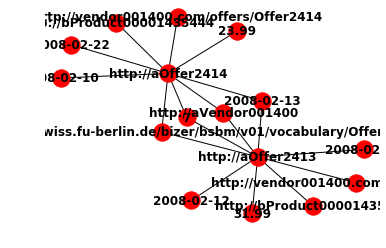

In [51]:
# Analysis

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants

display(HTML("<h1>Network analysis</h1>"))
display(HTML("<table><tr><th>Measure</th><th>Value</th>"))

# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

display(HTML("<tr><td>Network size</td><td>Number of nodes: {}; Number of edges: {}".format(G.number_of_nodes(), G.number_of_edges())))

display(HTML("</table>"))




# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(G)))
print()

# Density
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(G)))
print()

# Degree centrality -- mean and stdev
dc = nx.degree_centrality(G)
degrees = []
for k,v in dc.items():
    degrees.append(v)
    
print("DEGREE CENTRALITY")
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print()

# Eigenvector centrality -- mean and stdev
ec = nx.eigenvector_centrality(G)
degrees = []
for k,v in ec.items():
    degrees.append(v)
    
print("EIGENVECTOR CENTRALITY")
print("======================")
print("The mean network eigenvector centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print()

# Betweenness centrality -- mean and stdev
bc = nx.betweenness_centrality(G)
degrees = []
for k,v in bc.items():
    degrees.append(v)
print("BETWEENNESS CENTRALITY")
print("======================")
print("The mean betwenness centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print()


# Connected components
cc = list(nx.connected_components(G))
print("CONNECTED COMPONENTS")
print("====================")
print("The graph has {} connected components".format(len(cc)))
for i,c in enumerate(cc):
    print("Connected component {} has {} nodes".format(i,len(c)))
print()

# Clusters
cl = nx.clustering(G)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
print()
    
# Plot
print("Visualizing the graph:")
plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')